In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./mi_csk.csv')
df.head()

,match_id,mi_batting,inning,over,ball,total_runs,team_score
0,1,0,1,1,1,1,1
1,1,0,1,1,2,0,1
2,1,0,1,1,3,0,1
3,1,0,1,1,4,0,1
4,1,0,1,1,5,4,5


In [3]:
df['ball'] = df['ball'] + ((df['over']-1)*6)

In [4]:
df = df[(df['match_id'] == 9) | (df['match_id'] == 11)]

In [5]:
df = df.drop(['match_id', 'over'], axis=1)
df
df.head()

,mi_batting,inning,ball,total_runs,team_score
1975,0,1,1,1,1
1976,0,1,2,0,1
1977,0,1,3,3,4
1978,0,1,4,0,4
1979,0,1,5,0,4


<Axes: xlabel='ball', ylabel='team_score'>

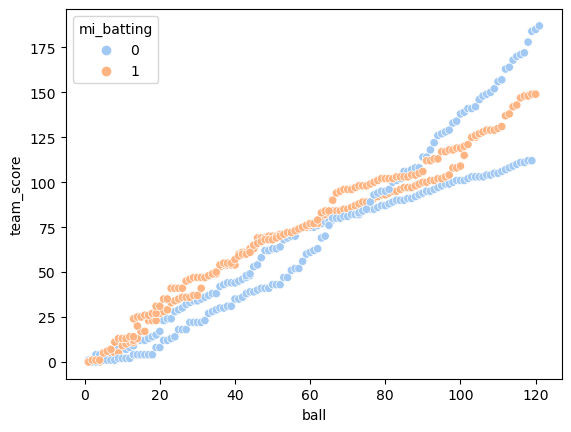

In [6]:
sns.scatterplot(data=df, x="ball", y="team_score", hue="mi_batting", palette="pastel")

In [7]:
features = df.drop("team_score", axis=1)
target = df["team_score"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 71.17024747577479


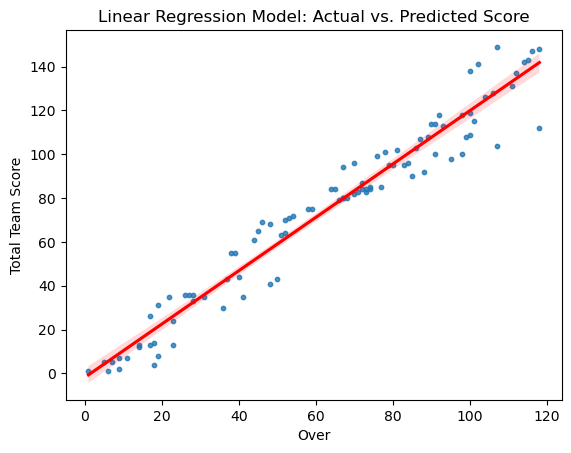

In [9]:
sns.regplot(x=X_test['ball'], y=y_test, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Over')
plt.ylabel('Total Team Score')
plt.title('Linear Regression Model: Actual vs. Predicted Score')
plt.show()

#### Applying cross-validation

### Ridge Regression

In [10]:
alpha = 100
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

ridge_y_pred = ridge_model.predict(X_test)

mse = mean_squared_error(y_test, ridge_y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 69.12664235887162


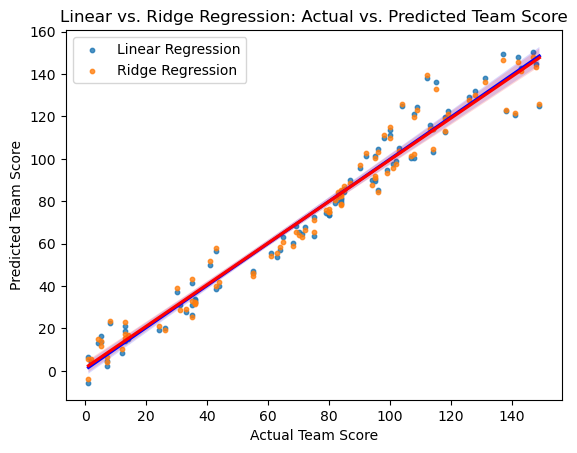

In [11]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'blue'}, label='Linear Regression')
sns.regplot(x=y_test, y=ridge_y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'}, label='Ridge Regression')

plt.xlabel('Actual Team Score')
plt.ylabel('Predicted Team Score')
plt.title('Linear vs. Ridge Regression: Actual vs. Predicted Team Score')
plt.legend()
plt.show()

### Lasso Regression

In [12]:
alpha = 100  
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

lasso_y_pred = lasso_model.predict(X_test)

In [13]:
mse_lasso = mean_squared_error(y_test, lasso_y_pred)
print(f'Mean Squared Error (Lasso): {mse_lasso}')

Mean Squared Error (Lasso): 89.71878185499247


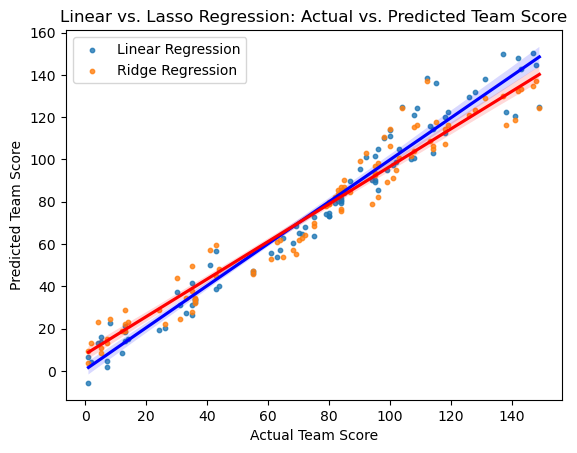

In [14]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'blue'}, label='Linear Regression')
sns.regplot(x=y_test, y=lasso_y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'}, label='Ridge Regression')

plt.xlabel('Actual Team Score')
plt.ylabel('Predicted Team Score')
plt.title('Linear vs. Lasso Regression: Actual vs. Predicted Team Score')
plt.legend()
plt.show()

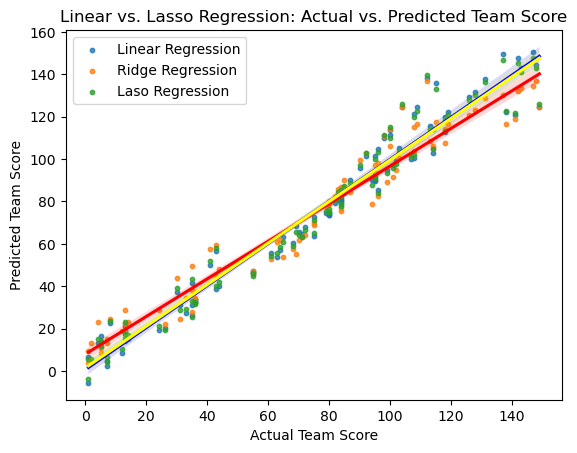

In [16]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'blue'}, label='Linear Regression')
sns.regplot(x=y_test, y=lasso_y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'}, label='Ridge Regression')
sns.regplot(x=y_test, y=ridge_y_pred, scatter_kws={'s': 10}, line_kws={'color': 'yellow'}, label='Laso Regression')

plt.xlabel('Actual Team Score')
plt.ylabel('Predicted Team Score')
plt.title('Linear vs. Lasso Regression: Actual vs. Predicted Team Score')
plt.legend()
plt.show()